<a href="https://colab.research.google.com/github/sppalmta/sppalmta/blob/main/spectral_radius3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Calculate Spectral Radius of Iteration Matrices**

**Part 3**: Create plot of $\rho$ vs. $\omega$

Matrix
$$A x = b$$
Split $A$ into diagonal, lower, and upper matrix
$$A = D - L - U$$

The iteration matrices are defined as:  (see class notes)
\begin{equation}
  \begin{aligned}
   M_J     &= D^{-1} \, (L+U) \\
   M_{GS}  &= (D-L)^{-1} \, U \\
   M_{SOR} &= (D - \omega L)^{-1} ((1-\omega)D + \omega U)
  \end{aligned}
\end{equation}


In [23]:
# Program to calculate spectral radius of iteration matrix
# See NE751 Notes

import numpy as np
from math import sqrt

# define constants
diff=1.8      # cm
sig_a=0.05    # cm^-1
nusig_f=0.06  # cm^-1
a=365         # cm

N=200

print(f'total length {a} cm')
print(f'N={N}')

# set up matrices
h=a/N

Dm = np.zeros((N,N))
U  = np.zeros((N,N))
L  = np.zeros((N,N))

#set up the Diagonal matrix
for i in range(N):   # 0 to 99
   Dm[i,i] = sig_a*h+2*(diff/h)
   if i == 1:
      Dm[i,i] = Dm[i,i]+2*diff
   if i == N-1:
      Dm[i,i] = Dm[i,i]+2*diff

# set up the upper triangular matrix
for i in range(N-1):  # 0 to 99-1
   U[i,i+1]=diff/h

# set up the lower triangular matrix
for i in range(1,N):  # 1 to 99
   L[i,i-1]=diff/h


total length 365 cm
N=200


In [24]:
# calculate optimum rho with spectrum radius for jacobi

# Jacobi Iterations
Dinv=np.linalg.inv(Dm)
MJ=np.matmul(Dinv,L+U)
w, v = np.linalg.eig(MJ)    # w eigenvalue, v eigenvector

rho_j = max(abs(w))
wopt = 2 / (1+sqrt(1-rho_j*rho_j))

print(f"rho_J  = {rho_j}")
print(f"wopt   = {wopt}")

rho_J  = 0.9556668404977838
wopt   = 1.545057569240247


**Calculate SOR Spectral Radius for different $\omega$**

In [31]:
print(f'N={N}')

# Loop over different omega

npoint=100   # 1 to 2 / npoint

rholist=np.zeros(npoint)
omegalist=np.zeros(npoint)

for i in range(npoint):
  omega=1+i/npoint
  print(f'omega = {omega}')

# SOR iterations
  M1=Dm-omega*L
  M2=(1-omega)*Dm + omega*U
  Msor =np.matmul(np.linalg.inv(M1),M2)
 
  w, v = np.linalg.eig(Msor)    # w eigenvalue, v eigenvector

  rho_sor = max(abs(w))

  print(f"rho_SOR {omega} = {rho_sor}")

  rholist[i]=rho_sor
  omegalist[i]=omega

print("finished")
#print(rholist)

j=np.argmin(rholist)
print(f'Minimum rho {min(rholist)} at omega {omegalist[j]}')
print(f'Optimium from above   {wopt}')



N=200
omega = 1.0
rho_SOR 1.0 = 0.9132991100270138
omega = 1.01
rho_SOR 1.01 = 0.9115467184909413
omega = 1.02
rho_SOR 1.02 = 0.9097567160868564
omega = 1.03
rho_SOR 1.03 = 0.9079277575328709
omega = 1.04
rho_SOR 1.04 = 0.9060584268704099
omega = 1.05
rho_SOR 1.05 = 0.9041472324142844
omega = 1.06
rho_SOR 1.06 = 0.9021926012377035
omega = 1.07
rho_SOR 1.07 = 0.9001928731389289
omega = 1.08
rho_SOR 1.08 = 0.8981462940293045
omega = 1.09
rho_SOR 1.09 = 0.8960510086736192
omega = 1.1
rho_SOR 1.1 = 0.8939050527041748
omega = 1.11
rho_SOR 1.11 = 0.8917063438179669
omega = 1.12
rho_SOR 1.12 = 0.8894526720532421
omega = 1.13
rho_SOR 1.13 = 0.8871416890253826
omega = 1.1400000000000001
rho_SOR 1.1400000000000001 = 0.884770895983296
omega = 1.15
rho_SOR 1.15 = 0.8823376305252342
omega = 1.16
rho_SOR 1.16 = 0.8798390517860396
omega = 1.17
rho_SOR 1.17 = 0.8772721238761049
omega = 1.18
rho_SOR 1.18 = 0.8746335973139722
omega = 1.19
rho_SOR 1.19 = 0.8719199881482249
omega = 1.2
rho_SOR 1.2 = 0.869

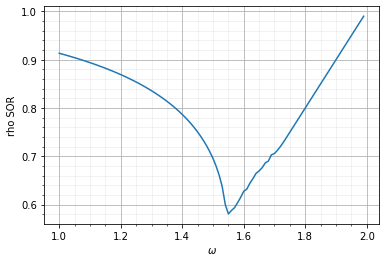

In [26]:
# from math import sqrt
# import sys
# import os
# import numpy
from matplotlib import pyplot as plt

#plt.plot(time,na, label="n")
plt.plot(omegalist,rholist)

plt.xlabel('$\omega$')
plt.ylabel('rho SOR')

plt.grid(b=True, which='major')
plt.minorticks_on()
plt.grid(b=True, which='minor', alpha=0.2)

#plt.legend(loc='center right')
#plt.legend(loc='center right', frameon=False)

# plt.savefig(fname+'.png',dpi=400)

plt.show()

